# Text Analytics

In [1]:
# Importing libraries

import pandas as pd 
import numpy as np
import string
import nltk
import matplotlib.pyplot as plt

# For sentimental analysis 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.decomposition import LatentDirichletAllocation

# For Warnings

import warnings
warnings.filterwarnings("ignore")

In [9]:
text_df=pd.read_csv("amazon_reviews_big.csv")
text_df.head(10)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09
5,B00166ZFSO,5,Its much more powerful then I expected!!!!!BIG...,"03 30, 2013",A2GO3OTJ5U9RBF,audioholic,JBL ES250PBK,1.364602e+09
6,B0002AFTDQ,5,A lot of computer fans come with the small 3 p...,"09 1, 2011",A3NVZTGPORNPRW,B. Pearce,"Inexpensive, does the job.",1.314835e+09
7,B00CS43I4Q,3,I finally found a 10 foot lightning cable to r...,"08 20, 2013",A2C6ISLU0E5K2B,Buff Crone,So much thicker than the one it replaced,1.376957e+09
8,B0073P32X2,2,VERY POOR QUALITY I USED IT ONCE AND THE CONNE...,"09 20, 2013",A3REKZPYAFOLUJ,BERNHARD THOMS,POOR,1.379635e+09
9,B000067DKI,4,I got this camera *years* ago! I still work w...,"05 17, 2008",A3Q1J68QY1MZQ9,Natalie Kilpatrick,"Horrid Autofocus/Noise, Otherwise Great!",1.210982e+09


In [10]:
text_df['reviewText'].dropna(axis=0,inplace = True)

# Sentimental Analysis

In [11]:
sentimental = SentimentIntensityAnalyzer()

text_polarity = lambda text: sentimental.polarity_scores(text)['compound']

text_df['Polarity'] = text_df['reviewText'].apply(text_polarity)

sentiment_mapping = {1:'Very Bad', 2:'bad', 3:'netural', 4:'good', 5:'very good'}

map_sentiment = lambda val: np.digitize(val,[-1, -0.5, -0.2, 0.2, 0.5])

text_df['sentiment_category'] = text_df['Polarity'].apply(map_sentiment)

text_df.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Polarity,sentiment_category
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09,0.8449,5
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09,0.9307,5
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09,0.9921,5
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09,0.5047,5
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09,0.9359,5


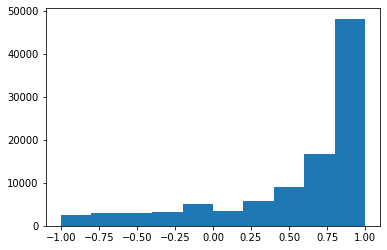

In [12]:
plt.hist(text_df['Polarity'])

plt.show()

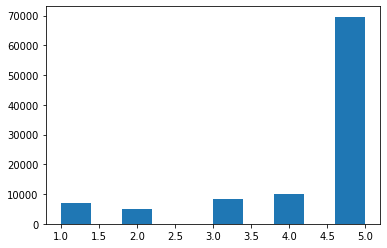

In [13]:
plt.hist(text_df['sentiment_category'])

plt.show()

# Topic Modeling 

In [14]:
text_df['sentiment_category'].unique()

array([5, 4, 1, 2, 3], dtype=int64)

In [15]:
negative_news = text_df.query('sentiment_category < 3') # seperating the negitive news text 
negative_news.shape

(11748, 10)

In [20]:
negative_news.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,Polarity,sentiment_category
8,B0073P32X2,2,VERY POOR QUALITY I USED IT ONCE AND THE CONNE...,"09 20, 2013",A3REKZPYAFOLUJ,BERNHARD THOMS,POOR,1.379635e+09,-0.8743,1
11,B001O5CCQK,3,I purchased this huge headset to use for music...,"02 2, 2010",A1QY8QWSAYP8QC,"KDC ""Fynack""",Great speakers...lousy mic,1.265069e+09,-0.2357,2
23,B001B8CSQ4,1,Now I hated the stupid mouse that came with my...,"12 9, 2008",A28EPFLFDW05C0,Brian,imac = HORRIBLE,1.228781e+09,-0.9013,1
28,B00BUKQ4ZO,3,"I only have this for a day, but I did some tes...","08 2, 2013",A2QPJCB6FH143I,Richard Pace,OK but buggy.,1.375402e+09,-0.8732,1
53,B002UNSBQK,5,I bought this case because my plastic Griffin ...,"10 11, 2012",A175LCRLFN26Y,bob,Recommended,1.349914e+09,-0.8129,1


In [19]:
# Appling Cleaning techniques on text column

doc = negative_news['reviewText'].str.lower().str.replace('[^a-z ]', '')
def sw(text):
    text = [word for word in text.split() if word not in set(stopwords.words('english'))]
    return " ".join(text)

doc_clean = doc.apply(sw)

def lw(x):
    x = [word for word in x.split() if len(word)>3]
    return " ".join(x)

doc_clean_final = doc_clean.apply(lw)
doc_clean_final.head()

8     poor quality used connection broke first small...
11    purchased huge headset music softphone sounds ...
23    hated stupid mouse came imac wasnt unhappy lit...
28    testing importing photos video generation ipad...
53    bought case plastic griffin case broke three m...
Name: reviewText, dtype: object

In [21]:
# Creating the count vectorizer and DTM

vector = CountVectorizer()
DTM = vector.fit_transform(doc_clean_final)

In [27]:
# Build LDA model with sklearn

lda_model = LatentDirichletAllocation(n_components=10, max_iter=10)
lda_output = lda_model.fit_transform(DTM)

In [28]:
# How to see the dominant topic in each document?

# Create the Dataframe - topic matrix

topicnames = ["Topic " + str(i) for i in range(lda_model.n_components)]
docnames = ["Doc " + str(i) for i in range(len(doc))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,dominant_topic
Doc 0,0.01,0.01,0.90,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2
Doc 1,0.01,0.32,0.64,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2
Doc 2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.00,8
Doc 3,0.27,0.41,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.25,1
Doc 4,0.00,0.00,0.38,0.60,0.00,0.00,0.00,0.00,0.00,0.00,3


In [29]:
# Review topics distribution across documents

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,2152
1,2,1977
2,7,1703
3,1,1467
4,9,1302
5,5,1168
6,8,805
7,0,788
8,6,218
9,4,168


In [30]:
# creating the Topic-Keyword Matrix

df_topic_keywords = pd.DataFrame(lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vector.get_feature_names()
df_topic_keywords.index = topicnames

# View

df_topic_keywords.head()

,aaaaa,aaafeature,aaas,aaathis,aads,aakn,aand,aasthe,aathis,aaxa,...,zuiko,zumbido,zumo,zune,zunei,zunes,zuni,zvizio,zyxel,zyxels
Topic 0,0.100000,0.100132,0.100000,0.1,0.100000,0.100000,0.100000,0.100000,1.099976,0.1,...,0.100000,0.1,0.100081,0.100012,1.099922,0.100005,0.10000,0.100000,0.100000,0.100000
Topic 1,0.100000,0.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.100000,0.100000,0.1,...,0.100000,0.1,0.100000,0.100007,0.100000,0.100002,0.10002,0.100006,0.100069,0.100027
Topic 2,0.100000,1.099608,0.100013,0.1,0.100000,0.100000,0.100000,0.100000,0.100000,0.1,...,0.100000,0.1,0.100000,0.100016,0.100000,0.100035,0.10000,0.100000,0.100003,0.100000
Topic 3,0.100001,0.100000,0.100006,0.1,0.100019,0.100015,0.100000,0.100003,0.100000,0.1,...,0.100108,0.1,0.100039,7.532134,0.100000,0.100000,0.10000,0.100000,0.100000,0.100000
Topic 4,0.100000,0.100000,0.100000,0.1,0.100000,0.100000,0.100027,0.100000,0.100000,0.1,...,0.100000,0.1,0.100000,0.100007,0.100000,0.100000,0.10000,0.100000,0.100000,0.100000


In [31]:
# each topic top10 words

def show_topics(vectorizer= vector, model=lda_model, n_words=20):
    keywords = np.array(vector.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer= vector, model= lda_model, n_words=10)        

# Creating Topic_Dataframe - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,would,unit,time,player,even,back,problem,like,video,garmin
Topic 1,router,work,problem,windows,wireless,would,computer,time,software,product
Topic 2,sound,cable,quality,dont,good,would,headphones,speakers,work,works
Topic 3,camera,case,lens,screen,like,dont,good,well,little,really
Topic 4,work,would,good,used,many,hard,even,didnt,dont,product
Topic 5,battery,charge,charger,batteries,power,phone,charging,plug,time,charged
Topic 6,would,mount,better,much,quality,dont,tablet,like,used,cable
Topic 7,would,cable,product,time,back,work,problem,bought,replacement,unit
Topic 8,mouse,keyboard,much,like,monitor,mount,time,dont,logitech,bought
Topic 9,drive,card,hard,drives,problems,computer,using,cards,memory,files
